<a href="https://colab.research.google.com/github/lsoica/blog/blob/main/assets/probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics & Probability

In [ ]:
!pip install seaborn

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Probability Theory

### Combinatorics

#### Permutations

Answer the following question: How many ways can you arrange `r` from a set of `n` if the order matters?
$$ P(n,1) = n = \frac{n!}{(n-1)!} $$
$$ P(n,2) = n * (n-1) = \frac{n!}{(n-2)!} $$
$$ P(n,n) = n! = \frac{n!}{(n-n)!} $$

```text
               a                b                 c                  d                n *
          b    c    d      a    c    d       a    b    d        a    b    c           (n - 1) *
         c d  b d  b c    c d  a d  a c     b d  a d  a b      c b  a c  a b          (n - 2) *
         d c  d b  c b    d c  d a  c a     d b  d a  b a      b c  c a  b a          (n - 3)
```

$$ P(n,r) = n * (n-1) * (n-2) * (n-3) .... (n-5) = \frac{n!}{(n-r)!} $$

#### Combinations

Answer the following question: How many ways can you arrange `r` from a set of `n` if the order matters?

For each arrangement of `r` there are $$ P(r,r) = r! $$ possible permutations, but we only want to pick `1`. So, to find $ C(n,r) $ we have to divide $ P(r,r) $ by $ r! $.

$$ C(n,r) = \frac{P(n,r)}{r!} = \frac{\frac{n!}{(n-r)!}}{r!} = \frac{n!}{(r!)(n-r)!} $$



#### Relation with probabilities

$$ P = \frac{\text{No of desired outcomes}}{\text{No of possible outcomes}} = \frac{k!}{P(n,r)} = \frac{k!}{\frac{n!}{(n-k)!}} = \frac{k! * (n-k)!}{n!}$$

### The Law of Large Numbers

The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability.

**Random Variable X** A process with multiple possible outcomes. E.g. rolling a dice ca have 6 possible outcomes. Rolling 2 dices have 36 possible outcomes ($6*6$).

**Central Limit Theorem** If we take many samples from a population and sum each sample the sum's distribution of will be normal, close to a Bell curve when $ N -> \infty $ regardless of the probability distribution of X.

Let's run some code to examine this in practice.

Mean:

$$ \mathbb{E}[X] = \sum_{x} x \cdot p(x) $$

Variance:

$$ \text{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2] = \sum_{x} (x - \mathbb{E}[X])^2 \cdot p(x) $$

Standard deviation:

$$ \sigma_X = \sqrt{\text{Var}(X)} $$

In [ ]:
!pip install np

In [54]:
# a function that a list of n unique numbers from 1 to 6
import random

def roll_dice(k=4):
    # Possible outcomes and their respective probabilities
    outcomes = [1, 2, 3, 4, 5, 6]
    weights = [0.1, 0.2, 0.15, 0.5, 0.3, 0.2]
    
    # Roll four dice independently
    roll_results = random.choices(outcomes, weights=weights, k=k)
    
    # Return the sum of the outcomes
    return sum(roll_results)


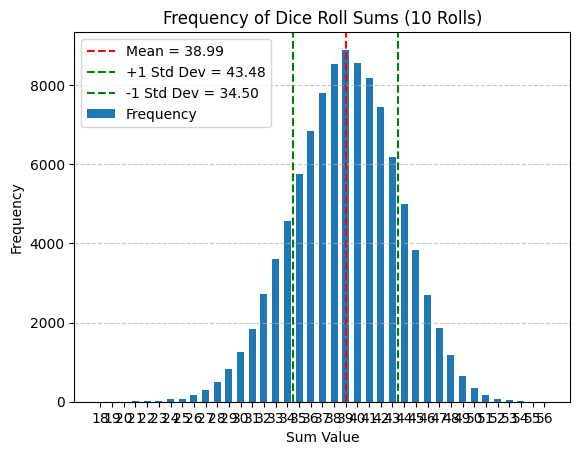

In [72]:
import matplotlib.pyplot as plt
from collections import Counter
import statistics

num_rolls = 100000
sums = []

# Roll dice and calculate sums
for _ in range(num_rolls):
    total = roll_dice(10)
    sums.append(total)

# Calculate mean and standard deviation
mean_value = statistics.mean(sums)
std_dev = statistics.stdev(sums)

# Count occurrences of each sum
sum_counts = Counter(sums)

# Prepare data for plotting
sum_values = sorted(sum_counts.keys())
counts = [sum_counts[sum_val] for sum_val in sum_values]

# Plotting the results
plt.bar(sum_values, counts, width=0.6, label='Frequency')
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean = {mean_value:.2f}')
plt.axvline(mean_value + std_dev, color='g', linestyle='--', label=f'+1 Std Dev = {mean_value + std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='g', linestyle='--', label=f'-1 Std Dev = {mean_value - std_dev:.2f}')

plt.title('Frequency of Dice Roll Sums (10 Rolls)')
plt.xlabel('Sum Value')
plt.ylabel('Frequency')
plt.xticks(sum_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### Standard normal distribution

For mean 0 and standard deviation 1:

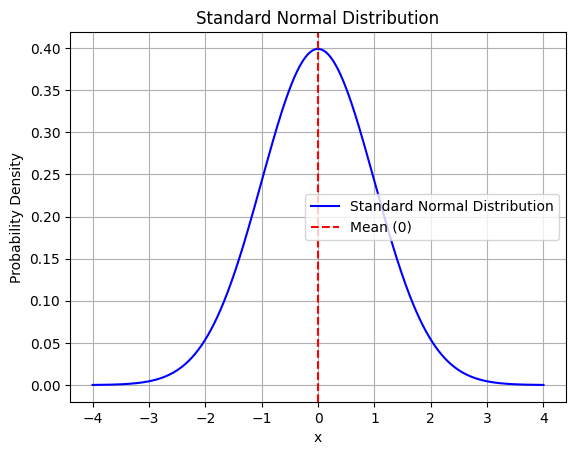

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def plot_standard_normal_distribution():
    # Generate data points for the x-axis
    x = np.linspace(-4, 4, 1000)  # Covering a range from -4 to 4

    # Calculate the probability density function (PDF) for the standard normal distribution
    pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

    # Plot the PDF
    plt.plot(x, pdf, label='Standard Normal Distribution', color='b')
    plt.title('Standard Normal Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.axvline(0, color='r', linestyle='--', label='Mean (0)')
    plt.legend()
    plt.show()

plot_standard_normal_distribution()


#### The 68-95-99.7 rule

68% of values fall between 1 standard deviation of the mean
95% of values fall between 2 standard deviations of the mean
99.7% of values fall between 3 standard deviations of the mean

